In [38]:
import logging

# Disable RDKit logging
logger = logging.getLogger('rdkit')
logger.disabled = True
import rdkit
print(rdkit.__version__)
from rdkit import Chem
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem, PandasTools

2021.03.2


In [39]:
'''
The activity data (IC50) of compounds tested on PPAR_gamma (homo sapiens) were downloaded from ChEMBL (CHEMBL235). 

'''
dfic50 = pd.read_csv('./data_sets/ppar_gamma_ic50.csv', delimiter=';')

In [40]:
len(dfic50)

2261

In [41]:

dfic50.dropna(subset = ['Smiles'],inplace=True)
dfic50["Standard Units"].unique(), dfic50['Standard Relation'].unique()

(array(['nM', nan], dtype=object),
 array(["'='", nan, "'>'", "'<'"], dtype=object))

In [42]:
dfic50_1 = dfic50[dfic50['Standard Relation']=="'='"]
dfic50_2 = dfic50.loc[(dfic50['Standard Relation']=="'>'")|(dfic50['Standard Relation']=="'>='")]
dfic50_3 = dfic50[dfic50['Standard Relation'].isna()]
len(dfic50_1), len(dfic50_2), len(dfic50_3)


(1911, 218, 117)

In [43]:
#Only the compounds with IC50 tested and pChEMBL values calculated were selected for further processing and analysis. 
dfic50_1.dropna(subset = ['pChEMBL Value'],inplace=True)
len(dfic50_1)

1903

In [44]:
dfic50_1

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL111271,NaN,NaN,508.59,2,6.98,25,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,IC50,'=',...,CHEMBL1149176,1,Scientific Literature,J Med Chem,2004.0,NaN,NaN,NaN,NaN,1.200
1,CHEMBL121106,NaN,NaN,357.44,0,2.49,1a,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,CHEMBL1130725,1,Scientific Literature,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN,0.030
2,CHEMBL121106,NaN,NaN,357.44,0,2.49,1a,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,CHEMBL1130725,1,Scientific Literature,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN,0.060
4,CHEMBL2037081,NaN,NaN,486.49,1,6.09,70,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,IC50,'=',...,CHEMBL2034870,1,Scientific Literature,Bioorg Med Chem,2012.0,NaN,NaN,NaN,NaN,6.857
5,CHEMBL3695875,NaN,NaN,508.67,2,8.62,BDBM147320,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@@...,IC50,'=',...,CHEMBL3638687,37,BindingDB Patent Bioactivity Data,NaN,2015.0,NaN,NaN,NaN,NaN,256.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,CHEMBL82293,PALMITIC ACID,-1.0,256.43,1,5.55,4,CCCCCCCCCCCCCCCC(=O)O,IC50,'=',...,CHEMBL3046720,1,Scientific Literature,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,30.000
2257,CHEMBL8659,OLEIC ACID,2.0,282.47,1,6.11,9,CCCCCCCC/C=C\CCCCCCCC(=O)O,IC50,'=',...,CHEMBL3046720,1,Scientific Literature,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,4.100
2258,CHEMBL1173474,BEHENIC ACID,NaN,340.59,1,7.89,7,CCCCCCCCCCCCCCCCCCCCCC(=O)O,IC50,'=',...,CHEMBL3046720,1,Scientific Literature,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,30.000
2259,CHEMBL3695916,NaN,NaN,558.72,2,8.68,55,CC[C@H](NC(=O)c1ccc2c(c1)c(C)c(C)n2Cc1ccc(-c2c...,IC50,'=',...,CHEMBL3734690,1,Scientific Literature,ACS Med Chem Lett,2015.0,NaN,NaN,NaN,NaN,9.000


In [45]:
len(dfic50_1[dfic50_1['pChEMBL Value']>=6]),len(dfic50_1[dfic50_1['pChEMBL Value']<6])

(1259, 644)

In [46]:
import sys
sys.path.append('/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/')
'''
The following function used for molecule preprocessing is from 'RingSySTEMS' project: https://github.com/anya-chen/RingSystems/tree/master/Preprocessing/src
'''
from src import MoleculePreprocessor
from src.MoleculePreprocessor import MoleculePreprocessor
from src.MoleculePreprocessorExtended import MoleculePreprocessorExtended

In [47]:
moleculesProcessed = MoleculePreprocessorExtended.init_with_smiles(list(dfic50_1.Smiles))

In [48]:
from rdkit import RDLogger
moleculesProcessed.csp_wash()

In [49]:
preprocessedSmilesDict = moleculesProcessed.get_rawsmiles_smiles_dict()

In [50]:
preprocessedSmiles_df = pd.DataFrame(list(preprocessedSmilesDict.items()), columns=['rawSmiles','preprocessedSmiles'])

In [51]:
preprocessed_df = pd.merge(dfic50_1, preprocessedSmiles_df, 
                           left_on='Smiles', right_on='rawSmiles')

In [52]:
preprocessed_df.dropna(subset=['preprocessedSmiles'],inplace=True) 

In [53]:
preprocessed_df = preprocessed_df[preprocessed_df['preprocessedSmiles']!='']

In [54]:
len(preprocessed_df)

1900

In [55]:
# Use the loc method to set the values in the new column based on the values in the existing column
preprocessed_df.loc[preprocessed_df['pChEMBL Value']>=6, 'y_true_label'] = '1'
preprocessed_df.loc[preprocessed_df['pChEMBL Value']<6, 'y_true_label'] = '0'

In [56]:
def remove_stereochemistry(smiles):
    # Convert the SMILES string to an RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    # Use the Chem.RemoveStereochemistry function to remove stereo informationz
    Chem.RemoveStereochemistry(mol)
    
    # Convert the molecule back to a SMILES string without stereochemistry
    return Chem.MolToSmiles(mol)

preprocessed_df['preprocessedSmiles'] = preprocessed_df['preprocessedSmiles'].apply(remove_stereochemistry)
preprocessed_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL111271,NaN,NaN,508.59,2,6.98,25,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,IC50,'=',...,J Med Chem,2004.0,NaN,NaN,NaN,NaN,1.200,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,0
1,CHEMBL121106,NaN,NaN,357.44,0,2.49,1a,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN,0.030,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1,1
2,CHEMBL121106,NaN,NaN,357.44,0,2.49,1a,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN,0.060,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1,1
3,CHEMBL121106,NaN,NaN,357.44,0,2.49,86,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,Eur J Med Chem,2011.0,NaN,NaN,NaN,NaN,210.000,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1,1
4,CHEMBL2037081,NaN,NaN,486.49,1,6.09,70,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,IC50,'=',...,Bioorg Med Chem,2012.0,NaN,NaN,NaN,NaN,6.857,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(CC(OC(C...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,CHEMBL150,KAEMPFEROL,NaN,286.24,0,2.28,20,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,Eur J Med Chem,2021.0,NaN,NaN,AGONIST,NaN,23.100,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
1899,CHEMBL379064,ISORHAMNETIN,NaN,316.26,0,2.29,1; Isorhamnetin,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,IC50,'=',...,Eur J Med Chem,2021.0,NaN,NaN,ANTAGONIST,NaN,3.500,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,0
1900,CHEMBL82293,PALMITIC ACID,-1.0,256.43,1,5.55,4,CCCCCCCCCCCCCCCC(=O)O,IC50,'=',...,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,30.000,CCCCCCCCCCCCCCCC(=O)O,CCCCCCCCCCCCCCCC(=O)O,0
1901,CHEMBL8659,OLEIC ACID,2.0,282.47,1,6.11,9,CCCCCCCC/C=C\CCCCCCCC(=O)O,IC50,'=',...,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,4.100,CCCCCCCC/C=C\CCCCCCCC(=O)O,CCCCCCCCC=CCCCCCCCC(=O)O,0


In [57]:
duplicates = preprocessed_df.duplicated('preprocessedSmiles', keep=False)

# Filter DataFrame to list duplicates with their information
duplicates_df = preprocessed_df[duplicates]
duplicates_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,rawSmiles,preprocessedSmiles,y_true_label
1,CHEMBL121106,NaN,NaN,357.44,0,2.49,1a,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN,0.030,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1,1
2,CHEMBL121106,NaN,NaN,357.44,0,2.49,1a,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,Bioorg Med Chem Lett,1998.0,NaN,NaN,NaN,NaN,0.060,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1,1
3,CHEMBL121106,NaN,NaN,357.44,0,2.49,86,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,IC50,'=',...,Eur J Med Chem,2011.0,NaN,NaN,NaN,NaN,210.000,CN(CCOc1ccc(C[C@@H]2SC(=O)NC2=O)cc1)c1ccccn1,CN(CCOc1ccc(Cc2sc(=O)[nH]c2O)cc1)c1ccccn1,1
4,CHEMBL2037081,NaN,NaN,486.49,1,6.09,70,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,IC50,'=',...,Bioorg Med Chem,2012.0,NaN,NaN,NaN,NaN,6.857,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(CC(OC(C...,1
8,CHEMBL3699355,NaN,NaN,638.61,2,9.20,BDBM147372,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,11.000,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,CHEMBL424133,LY-518674,2.0,409.49,0,3.76,5,Cc1ccc(Cn2nc(CCCc3ccc(OC(C)(C)C(=O)O)cc3)nc2O)cc1,IC50,'=',...,J Med Chem,2003.0,NaN,NaN,NaN,NaN,6500.000,Cc1ccc(Cn2nc(CCCc3ccc(OC(C)(C)C(=O)O)cc3)nc2O)cc1,Cc1ccc(Cn2[nH]c(CCCc3ccc(OC(C)(C)C(=O)O)cc3)nc...,0
1869,CHEMBL424133,LY-518674,2.0,409.49,0,3.76,42,Cc1ccc(Cn2nc(CCCc3ccc(OC(C)(C)C(=O)O)cc3)nc2O)cc1,IC50,'=',...,Bioorg Med Chem,2012.0,NaN,NaN,NaN,NaN,5.187,Cc1ccc(Cn2nc(CCCc3ccc(OC(C)(C)C(=O)O)cc3)nc2O)cc1,Cc1ccc(Cn2[nH]c(CCCc3ccc(OC(C)(C)C(=O)O)cc3)nc...,0
1881,CHEMBL3695816,NaN,NaN,532.60,2,6.33,2c,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,IC50,'=',...,Bioorg Med Chem Lett,2019.0,NaN,NaN,NaN,NaN,0.015,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,1
1882,CHEMBL3695816,NaN,NaN,532.60,2,6.33,BDBM147258,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,33.000,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,Cc1c(C)n(Cc2ccc(-c3ccccc3C(=O)O)cc2)c2ccc(C(=O...,1


In [58]:
groups = duplicates_df.groupby('preprocessedSmiles')
id_toremove = []
for name, group in groups:
    # Check if all values in 'y_true_label' are the same within the group
    if not group['y_true_label'].nunique() == 1:
        # Print out 'Molecule ChEMBL ID' for all entries in the group
        print(f"Different activity classifications found for {name}:")
        for chembl_id in group['Molecule ChEMBL ID']:
            print(chembl_id)
            id_toremove.append(chembl_id)

Different activity classifications found for C=C(OC(C)=O)c1c(C(=O)OC)cc2c(O)c3c(c(O)cc4cc(C)c(Cl)c(OC)c43)c(O)c2c1O:
CHEMBL254814
CHEMBL254814
Different activity classifications found for C=C1OC(=O)c2cc3c(O)c4c(c(O)cc5cc(C)c(Cl)c(OC)c54)c(O)c3c(O)c21:
CHEMBL400132
CHEMBL400132
Different activity classifications found for C=Cc1c(C(=O)OC)cc2c(O)c3c(c(O)cc4cc(C)c(Cl)c(OC)c43)c(O)c2c1O:
CHEMBL253120
CHEMBL253120
Different activity classifications found for CC1(C(=O)O)CCc2ccc(OCCCOc3ccc(Oc4ccccc4)cc3Cl)cc2O1:
CHEMBL111480
CHEMBL109638
CHEMBL112790
Different activity classifications found for CCC1(C(=O)O)CCc2ccc(OCCCOc3ccc(Oc4ccc(F)cc4)cc3Cl)cc2O1:
CHEMBL109241
CHEMBL112725
CHEMBL112725
Different activity classifications found for CCCCCCCCOc1ccc(C(=O)NC(C(=O)O)C(C)C)cc1:
CHEMBL4743677
CHEMBL4743677
Different activity classifications found for CCCCNC(=O)NS(=O)(=O)c1ccc(NC(=O)Cn2c(=O)c(C)nc3ccccc32)cc1:
CHEMBL3959627
CHEMBL3959627
Different activity classifications found for CCCCNC(=S)NS(=O)(=

In [59]:
print(len(id_toremove))

145


In [60]:
print(len(set(id_toremove)))

63


In [61]:
# Drop the rows involved in the printed chembl_ids
for i in set(id_toremove):
    preprocessed_df = preprocessed_df[preprocessed_df['Molecule ChEMBL ID'] != i]

In [62]:
preprocessed_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL111271,NaN,NaN,508.59,2,6.98,25,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,IC50,'=',...,J Med Chem,2004.0,NaN,NaN,NaN,NaN,1.200,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,0
4,CHEMBL2037081,NaN,NaN,486.49,1,6.09,70,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,IC50,'=',...,Bioorg Med Chem,2012.0,NaN,NaN,NaN,NaN,6.857,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(CC(OC(C...,1
5,CHEMBL3695875,NaN,NaN,508.67,2,8.62,BDBM147320,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@@...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,256.000,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@@...,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,1
6,CHEMBL3695892,NaN,NaN,527.50,2,8.77,BDBM147337,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@H...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,5.000,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@H...,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,1
7,CHEMBL3695898,NaN,NaN,506.62,2,7.61,BDBM147343,COc1c(F)cccc1[C@H](C)NC(=O)c1ccc2c(c1)c(C)c(C)...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,21.000,COc1c(F)cccc1[C@H](C)NC(=O)c1ccc2c(c1)c(C)c(C)...,COc1c(F)cccc1C(C)NC(=O)c1ccc2c(c1)c(C)c(C)n2Cc...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,CHEMBL150,KAEMPFEROL,NaN,286.24,0,2.28,20,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,Eur J Med Chem,2021.0,NaN,NaN,AGONIST,NaN,23.100,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
1899,CHEMBL379064,ISORHAMNETIN,NaN,316.26,0,2.29,1; Isorhamnetin,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,IC50,'=',...,Eur J Med Chem,2021.0,NaN,NaN,ANTAGONIST,NaN,3.500,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,0
1900,CHEMBL82293,PALMITIC ACID,-1.0,256.43,1,5.55,4,CCCCCCCCCCCCCCCC(=O)O,IC50,'=',...,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,30.000,CCCCCCCCCCCCCCCC(=O)O,CCCCCCCCCCCCCCCC(=O)O,0
1901,CHEMBL8659,OLEIC ACID,2.0,282.47,1,6.11,9,CCCCCCCC/C=C\CCCCCCCC(=O)O,IC50,'=',...,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,4.100,CCCCCCCC/C=C\CCCCCCCC(=O)O,CCCCCCCCC=CCCCCCCCC(=O)O,0


In [63]:
preprocessed_df.drop_duplicates('preprocessedSmiles',inplace=True)
preprocessed_df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,rawSmiles,preprocessedSmiles,y_true_label
0,CHEMBL111271,NaN,NaN,508.59,2,6.98,25,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,IC50,'=',...,J Med Chem,2004.0,NaN,NaN,NaN,NaN,1.200,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,0
4,CHEMBL2037081,NaN,NaN,486.49,1,6.09,70,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,IC50,'=',...,Bioorg Med Chem,2012.0,NaN,NaN,NaN,NaN,6.857,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(C[C@@H]...,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(CC(OC(C...,1
5,CHEMBL3695875,NaN,NaN,508.67,2,8.62,BDBM147320,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@@...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,256.000,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@@...,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,1
6,CHEMBL3695892,NaN,NaN,527.50,2,8.77,BDBM147337,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@H...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,5.000,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)N[C@H...,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,1
7,CHEMBL3695898,NaN,NaN,506.62,2,7.61,BDBM147343,COc1c(F)cccc1[C@H](C)NC(=O)c1ccc2c(c1)c(C)c(C)...,IC50,'=',...,NaN,2015.0,NaN,NaN,NaN,NaN,21.000,COc1c(F)cccc1[C@H](C)NC(=O)c1ccc2c(c1)c(C)c(C)...,COc1c(F)cccc1C(C)NC(=O)c1ccc2c(c1)c(C)c(C)n2Cc...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,CHEMBL150,KAEMPFEROL,NaN,286.24,0,2.28,20,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,IC50,'=',...,Eur J Med Chem,2021.0,NaN,NaN,AGONIST,NaN,23.100,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,0
1899,CHEMBL379064,ISORHAMNETIN,NaN,316.26,0,2.29,1; Isorhamnetin,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,IC50,'=',...,Eur J Med Chem,2021.0,NaN,NaN,ANTAGONIST,NaN,3.500,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,0
1900,CHEMBL82293,PALMITIC ACID,-1.0,256.43,1,5.55,4,CCCCCCCCCCCCCCCC(=O)O,IC50,'=',...,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,30.000,CCCCCCCCCCCCCCCC(=O)O,CCCCCCCCCCCCCCCC(=O)O,0
1901,CHEMBL8659,OLEIC ACID,2.0,282.47,1,6.11,9,CCCCCCCC/C=C\CCCCCCCC(=O)O,IC50,'=',...,Med Chem Res,2013.0,NaN,NaN,NaN,NaN,4.100,CCCCCCCC/C=C\CCCCCCCC(=O)O,CCCCCCCCC=CCCCCCCCC(=O)O,0


In [64]:
# Check for duplicates in 'preprocessedSmiles'
duplicates = preprocessed_df.duplicated(subset='preprocessedSmiles', keep=False)

# Show rows where 'preprocessedSmiles' is duplicated
duplicate_rows = preprocessed_df[duplicates]
duplicate_rows

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,rawSmiles,preprocessedSmiles,y_true_label


In [65]:
len(preprocessed_df[preprocessed_df['pChEMBL Value']>=6]),len(preprocessed_df[preprocessed_df['pChEMBL Value']<6])

(870, 480)

In [66]:
preprocessed_df_useful = preprocessed_df[['preprocessedSmiles','Molecule ChEMBL ID', 'y_true_label']]
preprocessed_df_useful

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label
0,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,CHEMBL111271,0
4,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(CC(OC(C...,CHEMBL2037081,1
5,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,CHEMBL3695875,1
6,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,CHEMBL3695892,1
7,COc1c(F)cccc1C(C)NC(=O)c1ccc2c(c1)c(C)c(C)n2Cc...,CHEMBL3695898,1
...,...,...,...
1898,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,CHEMBL150,0
1899,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,CHEMBL379064,0
1900,CCCCCCCCCCCCCCCC(=O)O,CHEMBL82293,0
1901,CCCCCCCCC=CCCCCCCCC(=O)O,CHEMBL8659,0


In [67]:
#save data to csv
preprocessed_df_useful.to_csv('./data_sets/ppar_gamma_preprocessed.csv', index=False, sep=';')

In [33]:
# add rdKit mol object to the dataframe
PandasTools.AddMoleculeColumnToFrame(preprocessed_df_useful,'preprocessedSmiles','Molecule')

/home/sliu/miniconda3/envs/cypscreen/lib/python3.8/site-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule
0,CCCc1cc(Oc2ccc(F)cc2)ccc1OCCCOc1ccc2c(c1)OC(CC...,CHEMBL111271,0,
4,Cc1oc(-c2ccc(C(F)(F)F)cc2)nc1Cn1ccc2cc(CC(OC(C...,CHEMBL2037081,1,
5,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,CHEMBL3695875,1,
6,Cc1c(C)n(Cc2ccc(-c3ccccc3)cc2)c2ccc(C(=O)NC(C)...,CHEMBL3695892,1,
7,COc1c(F)cccc1C(C)NC(=O)c1ccc2c(c1)c(C)c(C)n2Cc...,CHEMBL3695898,1,
...,...,...,...,...
1898,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,CHEMBL150,0,
1899,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,CHEMBL379064,0,
1900,CCCCCCCCCCCCCCCC(=O)O,CHEMBL82293,0,
1901,CCCCCCCCC=CCCCCCCCC(=O)O,CHEMBL8659,0,

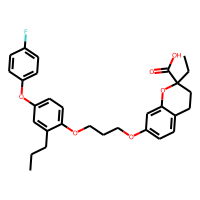
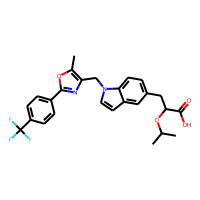
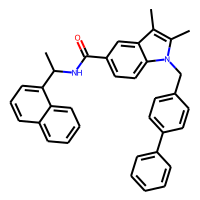
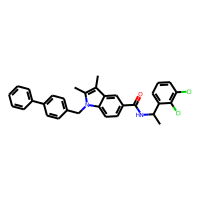
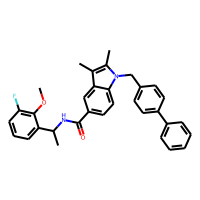
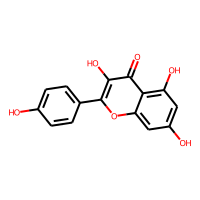
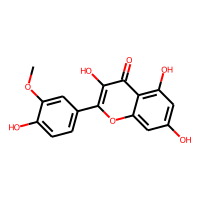
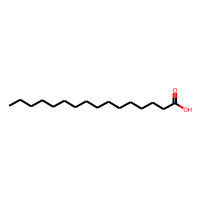
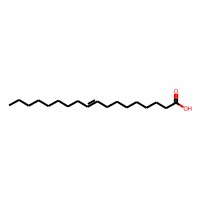
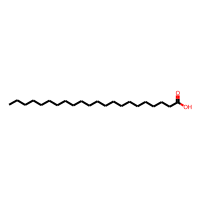

In [34]:
preprocessed_df_useful

In [35]:
#Morgan2 FP
def get_morgan2(mol):
    return list(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048))

In [36]:
import warnings

# Suppress specific performance warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)


In [35]:
preprocessed_df_useful['fp'] = preprocessed_df_useful['Molecule'].apply(get_morgan2) #doesn't work if save the fp in one column, but check duplicates first

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

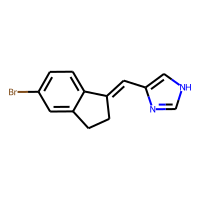
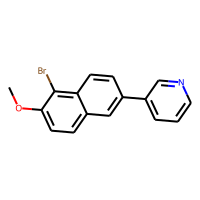
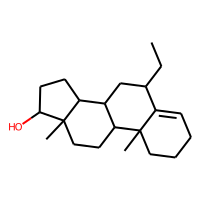
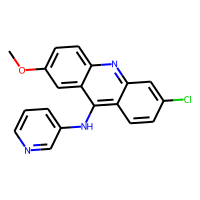
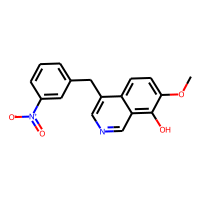
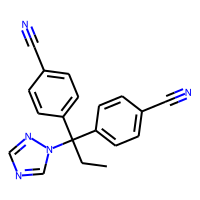
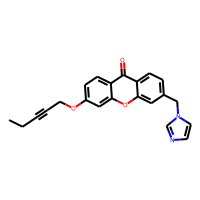
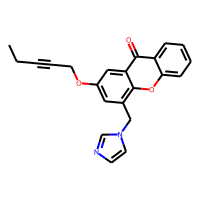
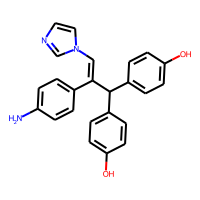
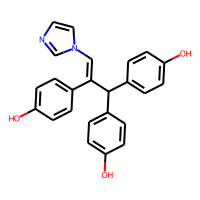

In [36]:
preprocessed_df_useful

In [37]:
def find_duplicates_with_labels(dataframe, fingerprint_col, label_col):
    # Initialize dictionary to hold fingerprints and their respective indices and labels
    fingerprint_dict = {}

    # Iterate through DataFrame rows
    for index, row in dataframe.iterrows():
        fp_tuple = tuple(row[fingerprint_col])
        label = row[label_col]

        # Update dictionary with index and label for each fingerprint
        if fp_tuple not in fingerprint_dict:
            fingerprint_dict[fp_tuple] = {'indices': [index], 'labels': [label]}
        else:
            fingerprint_dict[fp_tuple]['indices'].append(index)
            fingerprint_dict[fp_tuple]['labels'].append(label)

    # Identify duplicates: those with more than one index and check labels
    duplicates = {}
    for fp, details in fingerprint_dict.items():
        if len(details['indices']) > 1:
            # Check if all labels for these indices are the same
            if len(set(details['labels'])) == 1:
                duplicates[fp] = {'indices': details['indices'], 'labels': details['labels'][0], 'identical_labels': True}
            else:
                duplicates[fp] = {'indices': details['indices'], 'labels': set(details['labels']), 'identical_labels': False}

    return duplicates


In [38]:
import pandas as pd

def classify_duplicates(dataframe, fingerprint_col, label_col):
    fingerprint_dict = {}
    for index, row in dataframe.iterrows():
        fp_tuple = tuple(row[fingerprint_col])
        label = row[label_col]
        if fp_tuple not in fingerprint_dict:
            fingerprint_dict[fp_tuple] = {'indices': [index], 'labels': [label]}
        else:
            fingerprint_dict[fp_tuple]['indices'].append(index)
            fingerprint_dict[fp_tuple]['labels'].append(label)

    identical = []
    non_identical = []

    for fp, details in fingerprint_dict.items():
        if len(details['indices']) > 1:
            if len(set(details['labels'])) == 1:
                identical.extend(details['indices'][1:])
            else:
                non_identical.extend(details['indices'])

    return identical, non_identical


In [39]:
# Usage of the function
duplicates = find_duplicates_with_labels(preprocessed_df_useful, 'fp', 'y_true_label')

# Output results
if duplicates:
    print("Duplicates found:")
    for fp, info in duplicates.items():
        print(f"Fingerprint {fp} appears at rows {info['indices']} with labels {info['labels']} - Identical Labels: {info['identical_labels']}")
else:
    print("No duplicates found.")


Duplicates found:
Fingerprint (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

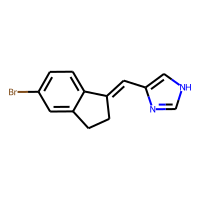
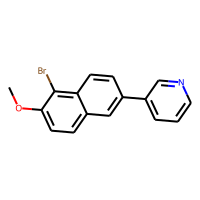
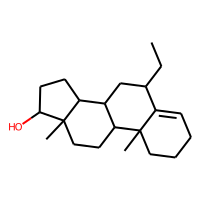
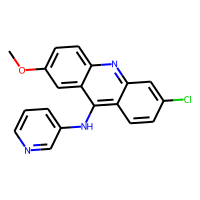
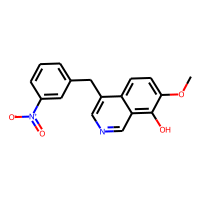
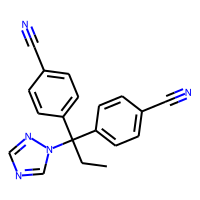
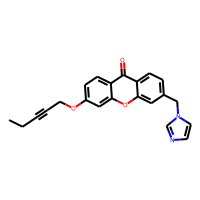
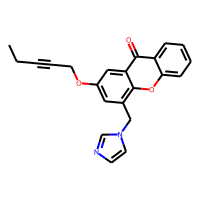
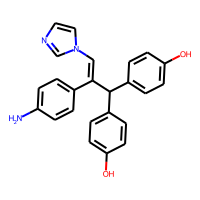
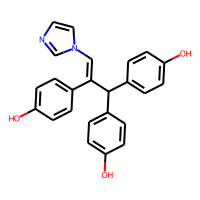

In [40]:
# Classify duplicates
identical_indices, non_identical_indices = classify_duplicates(preprocessed_df_useful, 'fp', 'y_true_label')

# Drop non-identical labels completely and identical label duplicates keeping the first occurrence
df_cleaned = preprocessed_df_useful.drop(index=non_identical_indices + identical_indices)
df_cleaned

In [41]:
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
df_cleaned[morgan2_cols] = df_cleaned.fp.to_list()

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,fp,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,morgan2_b4,...,morgan2_b2038,morgan2_b2039,morgan2_b2040,morgan2_b2041,morgan2_b2042,morgan2_b2043,morgan2_b2044,morgan2_b2045,morgan2_b2046,morgan2_b2047
0,Brc1ccc2c(c1)CCC2=Cc1c[nH]cn1,CHEMBL174579,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,COc1ccc2cc(-c3cccnc3)ccc2c1Br,CHEMBL196328,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CCC1CC2C(CCC3(C)C(O)CCC23)C2(C)CCCC=C12,CHEMBL306022,1,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,COc1ccc2nc3cc(Cl)ccc3c(Nc3cccnc3)c2c1,CHEMBL495567,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,COc1ccc2c(Cc3cccc([N+](=O)[O-])c3)cncc2c1O,CHEMBL495777,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,CCC(c1ccc(C#N)cc1)(c1ccc(C#N)cc1)n1cncn1,CHEMBL224462,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,CCC#CCOc1ccc2c(=O)c3ccc(Cn4ccnc4)cc3oc2c1,CHEMBL4632445,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2481,CCC#CCOc1cc(Cn2ccnc2)c2oc3ccccc3c(=O)c2c1,CHEMBL4634777,0,,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2482,Nc1ccc(C(=Cn2ccnc2)C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,CHEMBL4755831,1,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0

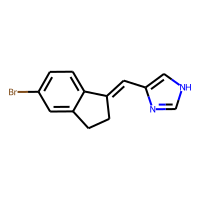
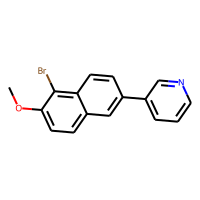
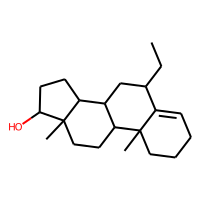
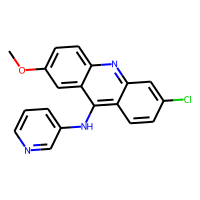
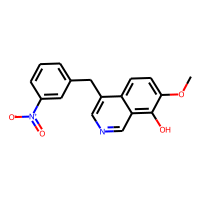
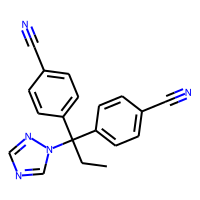
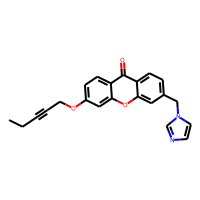
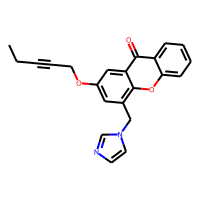
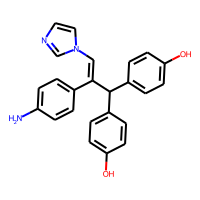
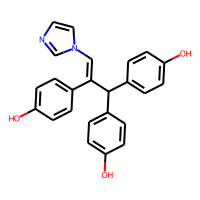

In [42]:
df_cleaned

## generate RDKit 2D descriptors

In [43]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

PandasTools.AddMoleculeColumnToFrame(df_cleaned,'preprocessedSmiles','Molecule')
descriptors_list = [x[0] for x in Descriptors._descList]
print(descriptors_list)
print(len(descriptors_list))

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [44]:
def compute_2Drdkit(mol):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    ds = calc.CalcDescriptors(mol)
    return list(ds)


In [45]:
df_cleaned['descriptor'] = df_cleaned.Molecule.apply(compute_2Drdkit)
#one descriptor per column
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
desc_cols = list(calc.GetDescriptorNames())
df_cleaned[desc_cols] = df_cleaned.descriptor.to_list()

In [46]:
df_cleaned[desc_cols]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.228995,1.005341,4.228995,1.005341,0.844932,275.149,264.061,274.010560,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.311073,0.848729,5.311073,0.848729,0.685407,314.182,302.086,313.010226,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.582239,-0.032752,10.582239,0.032752,0.648494,302.502,268.230,302.260966,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.139654,0.662212,6.139654,0.662212,0.523359,335.794,321.682,335.082540,118.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10.879415,-0.415136,10.879415,0.040178,0.588994,310.309,296.197,310.095357,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,9.038998,-0.543183,9.038998,0.543183,0.740537,313.364,298.244,313.132745,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2480,12.788407,-0.043745,12.788407,0.043745,0.408911,358.397,340.253,358.131742,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2481,13.008467,-0.065904,13.008467,0.065904,0.408911,358.397,340.253,358.131742,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2482,9.765064,-0.136829,9.765064,0.136829,0.435979,383.451,362.283,383.163377,144.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_cleaned[desc_cols].describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.0,...,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.0,1365.000000,1365.000000,1365.000000
mean,11.080630,-0.907200,11.080630,0.185241,0.592124,356.314084,336.423623,355.918108,131.065201,0.0,...,0.035165,0.178022,0.002930,0.005128,0.003663,0.027106,0.0,0.009524,0.088645,0.000733
std,2.634248,1.611815,2.634248,0.217643,0.177085,99.306028,96.216235,99.129314,34.230622,0.0,...,0.192056,0.467210,0.054074,0.071454,0.060434,0.166904,0.0,0.097160,0.552437,0.027067
min,2.402778,-5.325792,2.402778,0.000110,0.048436,250.301000,228.162000,250.110613,78.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,9.777155,-0.800948,9.777155,0.043286,0.489938,298.382000,276.210000,298.156895,112.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,12.218830,-0.238735,12.218830,0.100443,0.614555,333.391000,314.239000,333.147727,124.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,12.787358,0.028280,12.787358,0.240167,0.724788,379.312000,361.214000,378.219495,140.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,16.050416,1.181950,16.050416,1.181950,0.933823,892.866000,859.602000,892.179952,320.000000,0.0,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.0,1.000000,10.000000,1.000000


In [48]:
df_cleaned[desc_cols].dropna(inplace=True)

In [49]:
df_cleaned[desc_cols].isnull().values.any()

False

In [50]:
df_cleaned.reset_index(inplace=True)

In [51]:
actives = df_cleaned[df_cleaned['y_true_label']=='1']
inactives = df_cleaned[df_cleaned['y_true_label']=='0']

In [52]:
len(actives), len(inactives)

(756, 609)

In [117]:
#save the preprocessed dataframe active and inactives
actives.to_csv('./datasets/2_preprocessed/chembl_preprocessed_active.csv', index=False)
inactives.to_csv('./datasets/2_preprocessed/chembl_preprocessed_inactive.csv', index=False)
df_cleaned.to_csv('./datasets/2_preprocessed/chembl_preprocessed.csv', index=False)

In [53]:
#shuffel the data when train and test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cleaned, test_size= 0.2, random_state=42)
print(len(train), len(test))

1092 273


In [54]:
# get number of actives and inactives for both splits
train_actives = train[train['y_true_label']=='1']
train_inactives = train[train['y_true_label']=='0']
test_actives = test[test['y_true_label']=='1']
test_inactives = test[test['y_true_label']=='0']
len(train_actives), len(train_inactives), len(test_actives), len(test_inactives)

(610, 482, 146, 127)

In [120]:
train.to_csv('./datasets/3_train_test_split/chembl_train_ECFP4_rdkit2d.csv', index=False)
test.to_csv('./datasets/3_train_test_split/chembl_test_ECFP4_rdkit2d.csv', index=False)